<a href="https://colab.research.google.com/github/danamboss/bigbangdataAnalysis/blob/main/dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis of Big Bang Theory Episodes**

Below is the analysis of Big Bang Theory. In this analysis utilize two datasets; episodes and Imdb dataset.

In [16]:
##Importing and Loading files
from google.colab import files

uploaded = files.upload()

Saving big_bang_theory_episodes.csv to big_bang_theory_episodes (2).csv


In [34]:
##Importing Pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
uploaded2 = files.upload()

Saving big_bang_theory_imdb.csv to big_bang_theory_imdb (1).csv


Showing first five rows of Episode dataset

In [18]:
import io
dfepisodes = pd.read_csv(io.BytesIO(uploaded['big_bang_theory_episodes.csv']))
dfimdb = pd.read_csv(io.BytesIO(uploaded2['big_bang_theory_imdb.csv']))
dfepisodes.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9520000.0
1,1,2,2,The Big Bran Hypothesis,Mark Cendrowski,Story by: Chuck Lorre & Bill PradyTeleplay by:...,2007-10-01,3T6601,8580000.0
2,1,3,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by: Chuck LorreTeleplay by: Bill Prady &...,2007-10-08,3T6602,8360000.0
3,1,4,4,The Luminous Fish Effect,Mark Cendrowski,Story by: Chuck Lorre & Bill PradyTeleplay by:...,2007-10-15,3T6603,8150000.0
4,1,5,5,The Hamburger Postulate,Andrew D. Weyman,Story by: Jennifer GlickmanTeleplay by: Dave G...,2007-10-22,3T6604,8810000.0


Showing the first five rows of IMDB dataset

In [19]:
dfimdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Unaired Pilot,1 May 2006,6.7,2048,"The first Pilot of what will become ""The Big B..."
1,1,2,Pilot,24 Sep. 2007,8.2,6135,A pair of socially awkward theoretical physici...
2,1,3,The Big Bran Hypothesis,1 Oct. 2007,8.3,4924,Penny is furious with Leonard and Sheldon when...
3,1,4,The Fuzzy Boots Corollary,8 Oct. 2007,7.7,4392,Leonard gets upset when he discovers that Penn...
4,1,5,The Luminous Fish Effect,15 Oct. 2007,8.1,4434,Sheldon's mother is called to intervene when h...


Printing Summary statistics of the Episodes data set

In [20]:
dfepisodes.describe()

,season,episode_num_in_season,episode_num_overall,us_viewers
count,279.000000,279.000000,279.000000,2.790000e+02
mean,6.666667,12.204301,140.000000,1.464631e+07
std,3.382137,6.832359,80.684571,3.014511e+06
min,1.000000,1.000000,1.000000,7.340000e+06
25%,4.000000,6.000000,70.500000,1.279500e+07
50%,7.000000,12.000000,140.000000,1.504000e+07
75%,10.000000,18.000000,209.500000,1.715500e+07
max,12.000000,24.000000,279.000000,2.044000e+07


Showing Count of Episodes Directed by each director on the show

In [26]:
dfepisodes.groupby('directed_by')['episode_num_in_season'].count()

directed_by
Andrew D. Weyman      1
Anthony Rich         12
Gay Linvill           2
Howard Murray         2
James Burrows         1
Joel Murray           1
Kristy Cecil          2
Mark Cendrowski     244
Nikki Lorre           6
Peter Chakos          7
Ted Wass              1
Name: episode_num_in_season, dtype: int64

Showing Visualistion of Directors and Count of Episodes they directed

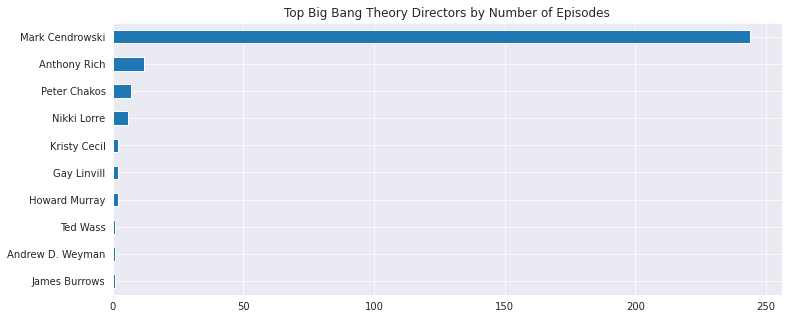

In [37]:
title_text = "Top Big Bang Theory Directors by Number of Episodes" 
dfepisodes['directed_by'].value_counts().head(10).sort_values().plot.barh(figsize=(12, 5), title=title_text);

Data sorting for visualisation of Avg viewers per season

In [29]:
# create a line plot of all the average us_viewers
average_viewers = list(dfepisodes.groupby('season')['us_viewers'].mean())
average_viewers = [int(i) for i in average_viewers]
average_viewers

[8443529,
 10142608,
 14118695,
 12558333,
 14881250,
 16799166,
 17695000,
 17497500,
 17708750,
 16670833,
 13999166,
 13222083]

In [30]:
seasons = [x for x in range(1,13)]
seasons

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

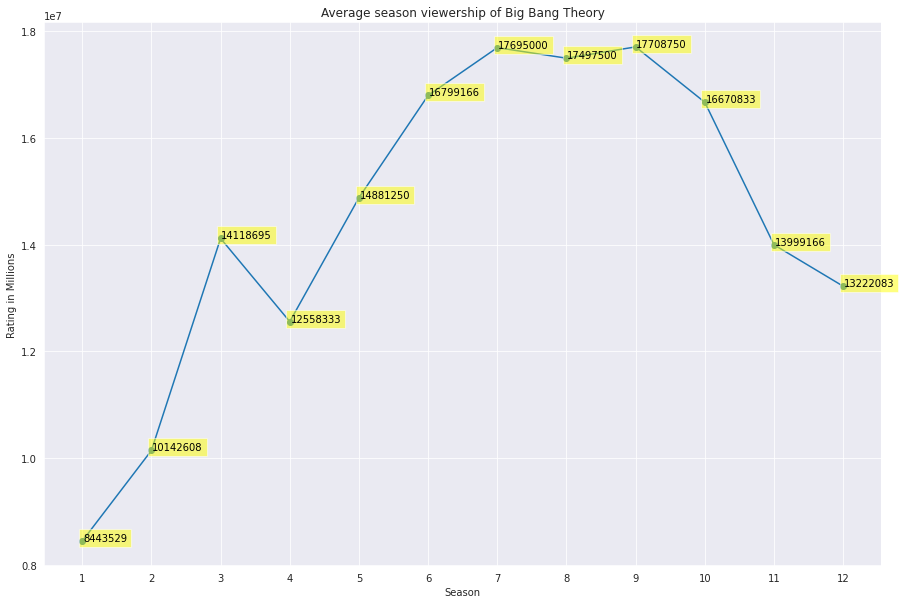

In [35]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.plot(seasons,average_viewers,marker="o")
for a,b in zip(seasons, average_viewers): 
    plt.text(a+0.01, b+0.01, str(b),color='black',bbox=dict(facecolor='yellow',alpha=0.5))
plt.title('Average season viewership of Big Bang Theory')
plt.xlabel('Season')
plt.ylabel('Rating in Millions')
plt.xticks(seasons, seasons)
plt.grid(True)

plt.savefig('viewership.png')

Showing viewership numbers by episode

Text(0.5, 1.0, 'Title by Viewers')

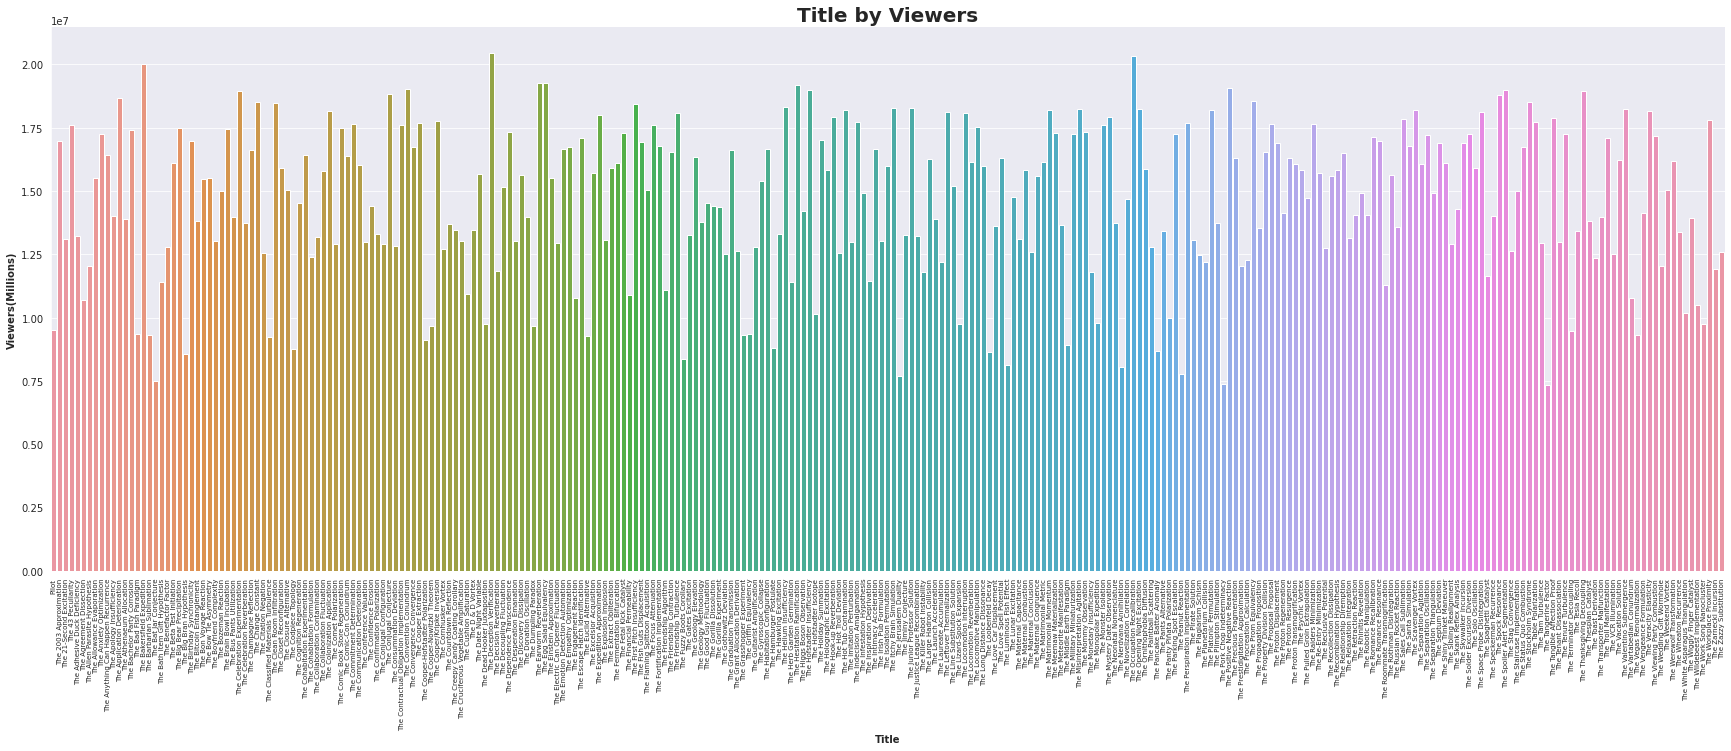

In [48]:
fig = plt.figure(figsize=(30,10))
sns.barplot(x=dfepisodes.groupby(['title'])['us_viewers'].sum().index,
            y=dfepisodes.groupby(['title'])['us_viewers'].sum().values)
plt.tick_params(axis='x',rotation=90,labelsize=7)
sns.despine()
plt.xlabel('Title',weight='bold')
plt.ylabel('Viewers(Millions)',weight='bold')
plt.title('Title by Viewers',weight='bold',fontsize=20)